### EU/UK House Price index Data (2015 = 100)

Sources: 

[EU Eurostat](https://ec.europa.eu/eurostat/databrowser/)
[UK Land Registry](https://landregistry.data.gov.uk/app/ukhpi)
[EU GDP](https://data.worldbank.org/indicator/NY.GDP.MKTP.CD?locations=EU&most_recent_value_desc=true)

Eurostat API Documentation: [Eurostat API](https://wikis.ec.europa.eu/display/EUROSTATHELP/API+-+Getting+started)
Packages used: [eurostat](https://pypi.org/project/eurostat/)

Eurostat is an official website of the European Union that offers access to datasets and statistics on a wide range of topics.
The information can be accessed programmatically through their API, which provides data in JSON-stat 2.0 format and supports REST protocol.
When making a query through the API, the response is a deeply nested json object, which is shown below for demonstration purposes.
Therefore, to analise the data we are using the Eurostat Python Package, which is a tool that uses Eurostat SDMX 2.1 API web services to retrieve and convert the information into a Pandas DataFrame.

In [3]:
# Demonstration of the information in json format 

# Import relevant modules

import requests
import json

In [4]:
# Make request to API and display json object

r = requests.get('https://ec.europa.eu/eurostat/api/dissemination/statistics/1.0/data/prc_hpi_a?format=JSON&sinceTimePeriod=2015&geo=EA&geo=BE&geo=BG&geo=CZ&geo=DK&geo=DE&geo=EE&geo=IE&geo=ES&geo=FR&geo=HR&geo=IT&geo=CY&geo=LV&geo=LT&geo=LU&geo=HU&geo=MT&geo=NL&geo=AT&geo=PL&geo=PT&geo=RO&geo=SI&geo=SK&geo=FI&geo=SE&geo=IS&geo=NO&geo=CH&geo=UK&geo=TR&unit=I15_A_AVG&purchase=TOTAL&lang=en')
j = r.json()
j

{'version': '2.0',
 'class': 'dataset',
 'label': 'House price index (2015 = 100) - annual data',
 'source': 'ESTAT',
 'updated': '2023-07-05T11:00:00+0200',
 'value': {'152': 100.0,
  '153': 108.53,
  '154': 114.26,
  '155': 119.64,
  '156': 126.6,
  '157': 136.31,
  '158': 153.26,
  '159': 170.77,
  '8': 100.0,
  '9': 102.64,
  '10': 106.37,
  '11': 109.42,
  '12': 113.78,
  '13': 118.6,
  '14': 127.06,
  '15': 134.19,
  '16': 100.0,
  '17': 107.02,
  '18': 116.3,
  '19': 123.96,
  '20': 131.42,
  '21': 137.41,
  '22': 149.33,
  '23': 169.92,
  '96': 100.0,
  '97': 100.27,
  '98': 102.52,
  '99': 104.32,
  '100': 108.2,
  '101': 107.98,
  '102': 104.33,
  '103': 107.71,
  '24': 100.0,
  '25': 107.2,
  '26': 119.7,
  '27': 130.0,
  '28': 141.9,
  '29': 153.9,
  '30': 184.2,
  '31': 215.3,
  '40': 100.0,
  '41': 107.5,
  '42': 114.1,
  '43': 121.7,
  '44': 128.7,
  '45': 138.7,
  '46': 154.7,
  '47': 162.9,
  '32': 100.0,
  '33': 105.22,
  '34': 110.0,
  '35': 114.81,
  '36': 117.51,
 

### Obtaining the data and cleaning

In [309]:
import eurostat
import pandas as pd
from datetime import datetime

In [193]:
# Dataset code
code = 'PRC_HPI_A'

# Get filter parameters for the selected code
pars = eurostat.get_pars(code)
pars

['freq', 'purchase', 'unit', 'geo']

In [194]:
eurostat.get_par_values(code, 'purchase')

['TOTAL', 'DW_NEW', 'DW_EXST']

In [16]:
eurostat.get_par_values(code, 'unit')

['I10_A_AVG', 'I15_A_AVG', 'RCH_A_AVG']

In [17]:
eurostat.get_par_values(code, 'geo')

['EU',
 'EU27_2020',
 'EU28',
 'EA',
 'EA20',
 'EA19',
 'BE',
 'BG',
 'CZ',
 'DK',
 'DE',
 'EE',
 'IE',
 'ES',
 'FR',
 'HR',
 'IT',
 'CY',
 'LV',
 'LT',
 'LU',
 'HU',
 'MT',
 'NL',
 'AT',
 'PL',
 'PT',
 'RO',
 'SI',
 'SK',
 'FI',
 'SE',
 'IS',
 'NO',
 'CH',
 'UK',
 'TR']

In [361]:
# Creating the desired filters

regions = ['EU', 'BE', 'BG', 'CZ', 'DK', 'DE', 'EE', 'IE', 'ES', 'FR', 'HR', 'IT', 'CY', 'LV', 'LT', 'LU', 'HU', 'MT', 'NL', 'AT', 'PL', 'PT',
        'RO', 'SI', 'SK', 'FI', 'SE', 'IS', 'NO', 'UK']

my_filter_pars = {'unit': 'I15_A_AVG', 'purchase': 'TOTAL', 'geo': regions, 'startPeriod': 2006}

# Creating the dataframe

df_euhouseindex = eurostat.get_data_df(code, filter_pars=my_filter_pars)

In [325]:
# Display columns and first five rows

df_euhouseindex.head()

,freq,purchase,unit,geo\TIME_PERIOD,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,A,TOTAL,I15_A_AVG,EU,93.43,101.29,101.85,97.29,98.46,98.77,96.94,95.77,97.34,100.0,104.68,109.60,114.79,119.74,126.19,136.79,147.31
1,A,TOTAL,I15_A_AVG,BE,79.56,85.76,89.54,89.12,91.92,95.61,97.75,98.90,98.35,100.0,102.64,106.37,109.42,113.78,118.60,127.06,134.19
2,A,TOTAL,I15_A_AVG,BG,91.86,118.42,147.97,117.79,105.81,99.98,98.07,95.92,97.29,100.0,107.02,116.30,123.96,131.42,137.41,149.33,169.92
3,A,TOTAL,I15_A_AVG,CZ,NaN,NaN,100.80,96.90,95.20,95.30,93.90,93.90,96.20,100.0,107.20,119.70,130.00,141.90,153.90,184.20,215.30
4,A,TOTAL,I15_A_AVG,DK,102.89,105.65,100.19,88.19,90.66,89.12,86.71,90.09,93.49,100.0,105.22,110.00,114.81,117.51,123.48,137.98,137.33


In [362]:
# Dropping unnecessary columns

df_euhouseindex.drop(['freq', 'purchase', 'unit'], axis=1, inplace=True)

The next cell should be executed only if creating the DataFrame from the Microsoft Excel sheet provided as back up.

In [228]:
#df_euhouseindex = pd.read_excel('data/eu_hpi.xls', sheet_name = 'Sheet 1')

In [363]:
# Renaming and changing dataframe index

df_euhouseindex.rename(columns={"geo\TIME_PERIOD": "Geo"}, inplace=True)
df_euhouseindex = df_euhouseindex.set_index(['Geo'])

In [344]:
# Create dataframes for missing data (UK HPI)
# Calculation method remains the same as the data from Eurostat (yearly average, base 2015=100)

uk_hpi = pd.read_csv('data/uk_hpi.csv')

In [364]:
# Add missing data for UK 2020-2022

df_euhouseindex.loc['UK', ['2020', '2021', '2022']] = uk_hpi['House price index All property types'].to_list()


In [365]:
# Transpose dataframe for better readability and consistency with other datasets. Move UK column to thr second position. Convert index to numeric. Display complete data

df_euhouseindex = df_euhouseindex.transpose()
df_euhouseindex.index = pd.to_numeric(df_euhouseindex.index)
col = df_euhouseindex.pop('UK')
df_euhouseindex.insert(1, 'UK', col)
pd.set_option('display.max_columns', None)
df_euhouseindex

Geo,EU,UK,BE,BG,CZ,DK,DE,EE,IE,ES,FR,HR,IT,CY,LV,LT,LU,HU,MT,NL,AT,PL,PT,RO,SI,SK,FI,SE,IS,NO
2006,93.43,85.10,79.56,91.86,NaN,102.89,83.0,88.22,151.50,135.50,94.51,NaN,NaN,108.57,104.48,94.25,NaN,NaN,70.04,110.73,NaN,NaN,NaN,NaN,NaN,75.99,81.56,58.46,70.79,61.66
2007,101.29,93.54,85.76,118.42,NaN,105.65,81.2,106.54,162.81,148.79,100.57,NaN,NaN,121.32,142.37,119.06,74.42,98.91,84.75,116.10,NaN,NaN,NaN,NaN,120.85,98.00,86.37,65.74,77.44,69.43
2008,101.85,89.41,89.54,147.97,100.8,100.19,82.3,96.29,151.51,146.66,101.52,124.14,NaN,128.17,143.94,129.76,76.91,101.26,94.14,118.64,NaN,NaN,107.53,NaN,129.31,115.55,87.06,66.47,82.26,68.69
2009,97.29,81.44,89.12,117.79,96.9,88.19,83.0,60.47,122.49,136.97,95.32,117.93,NaN,119.76,90.24,90.92,76.02,95.95,90.07,113.35,NaN,NaN,106.54,129.28,117.06,100.82,88.31,68.57,74.28,69.99
2010,98.46,86.15,91.92,105.81,95.2,90.66,83.9,63.90,105.96,134.55,99.74,110.47,118.1,112.90,80.35,84.20,80.14,93.66,91.04,111.40,76.80,105.61,107.36,119.54,117.21,96.78,93.88,73.97,72.02,75.77
2011,98.77,84.88,95.61,99.98,95.3,89.12,86.8,69.32,87.86,124.27,105.46,110.66,119.7,111.09,88.73,89.77,83.09,90.45,89.80,109.19,81.60,105.70,102.09,104.83,120.39,95.33,96.87,75.87,75.36,81.95
2012,96.94,85.20,97.75,98.07,93.9,86.71,89.8,74.37,76.04,105.90,104.88,108.93,116.7,107.70,91.36,89.56,86.58,87.10,92.54,101.86,87.57,102.01,94.87,99.51,112.09,92.75,99.21,76.83,80.57,87.48
2013,95.77,87.39,98.90,95.92,93.9,90.09,92.6,82.29,76.99,96.24,102.93,104.63,109.1,103.29,97.62,90.65,90.89,84.87,92.16,95.75,92.10,97.54,93.09,99.26,106.21,93.59,100.35,80.79,85.21,91.24
2014,97.34,94.40,98.35,97.29,96.2,93.49,95.5,93.58,89.72,96.54,101.36,102.98,104.0,101.47,103.48,96.47,94.88,88.43,94.51,96.53,95.33,98.50,97.04,97.22,99.20,94.91,100.00,88.40,92.39,93.74
2015,100.00,100.00,100.00,100.00,100.0,100.00,100.0,100.00,100.00,100.00,100.00,100.00,100.0,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00


In [338]:
df_euhouseindex.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17 entries, 2006 to 2022
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   EU      17 non-null     float64
 1   BE      17 non-null     float64
 2   BG      17 non-null     float64
 3   CZ      15 non-null     float64
 4   DK      17 non-null     float64
 5   DE      17 non-null     float64
 6   EE      17 non-null     float64
 7   IE      17 non-null     float64
 8   ES      17 non-null     float64
 9   FR      17 non-null     float64
 10  HR      15 non-null     float64
 11  IT      13 non-null     float64
 12  CY      17 non-null     float64
 13  LV      17 non-null     float64
 14  LT      17 non-null     float64
 15  LU      16 non-null     float64
 16  HU      16 non-null     float64
 17  MT      17 non-null     float64
 18  NL      17 non-null     float64
 19  AT      13 non-null     float64
 20  PL      13 non-null     float64
 21  PT      15 non-null     float64
 22  RO  

### UK/London monthly stats

In [398]:
uk_df = pd.read_csv('data/landregistry_uk_monthly_stats.csv')
london_df = pd.read_csv('data/landregistry_london_monthly_stats.csv')
outerlondon_df = pd.read_csv('data/landregistry_outer_london_monthly_stats.csv')
innerlondon_df = pd.read_csv('data/landregistry_inner_london_monthly_stats.csv')
cityoflondon_df = pd.read_csv('data/landregistry_city_of_london_monthly_stats.csv')


In [397]:
# Create function to reformat the dataframes previously created

def clean_lr_df(data):
    data.drop(columns=['URI', 'Region GSS code', 'Reporting period'], inplace=True)
    data.rename(columns={'Name': 'Region'}, inplace=True)
    data['Pivotable date'] = pd.to_datetime(data['Pivotable date'], format='%Y-%m-%d')
    data['Period'] = pd.to_datetime(data['Period'], format='%Y-%m')
    data.set_index(['Pivotable date'], inplace=True)

In [399]:
# Applying the function defined above to reformat the data

clean_lr_df(uk_df)
clean_lr_df(london_df)
clean_lr_df(innerlondon_df)
clean_lr_df(outerlondon_df)
clean_lr_df(cityoflondon_df)

## Visualization and analysis

In [350]:
import matplotlib.pyplot as plt
import seaborn as sns

#### 1. How does the UK House Price Index compare to the rest of the region?

We can see that overall, the UK HPI follows closely the EU average HPI.
The UK was more affected than the EU as a whole by the 2008 financial crisis. 
Between 2008 and 2009, the EU HPI fell by 4.5%, while in the UK, the HPI fell by 8.9%. Starting in 2013, house prices recovered and follow the price trend of the EU.

In [504]:
# Calculate how much the HPI dropped from between 2008 and 2009

eu_drop_2008 = (df_euhouseindex.loc[2008, 'EU'] - df_euhouseindex.loc[2009, 'EU']) / df_euhouseindex.loc[2008, 'EU'] * 100
uk_drop_2008 = (df_euhouseindex.loc[2008, 'UK'] - df_euhouseindex.loc[2009, 'UK']) / df_euhouseindex.loc[2008, 'UK'] * 100

f'2008 crisis impact. In the EU, on average, the HPI fell by: {eu_drop_2008:.1f}%. In the UK, the HPI fell by {uk_drop_2008:.1f}%'


'2008 crisis impact. In the EU, on average, the HPI fell by: 4.5%. In the UK, the HPI fell by 8.9%'

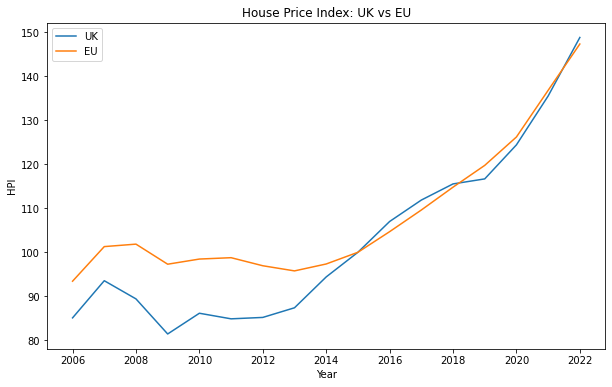

In [400]:
# UK vs EU House Price Index comparison

plt.figure(figsize=(10,6))

plt.plot(df_euhouseindex.UK, label='UK')
plt.plot(df_euhouseindex.EU, label='EU')

plt.title('House Price Index: UK vs EU')
plt.ylabel('HPI')
plt.xlabel('Year')
plt.legend(loc="upper left")

plt.show()

<Axes: xlabel='Geo'>

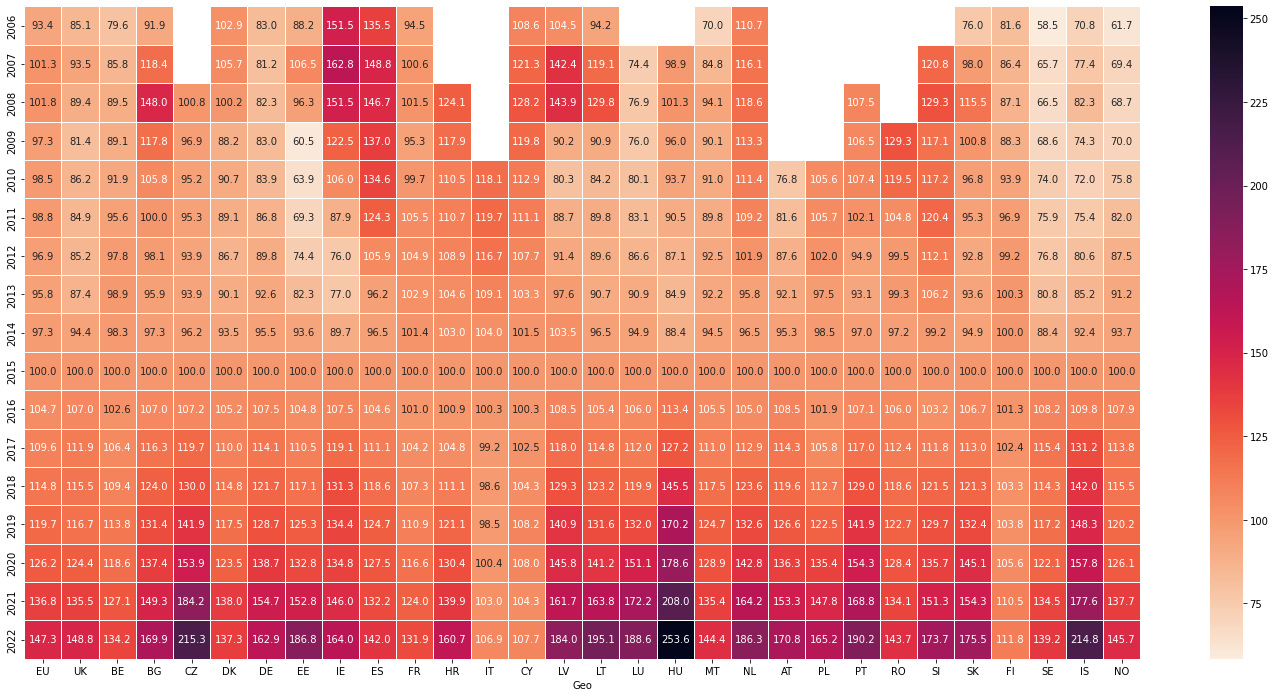

In [367]:
# EU vs UK House Price Index overview

plt.figure(figsize=(25,12))
cmap = sns.cm.rocket_r
sns.heatmap(df_euhouseindex, annot=True, fmt=".1f", linewidth=.5, cmap = cmap)


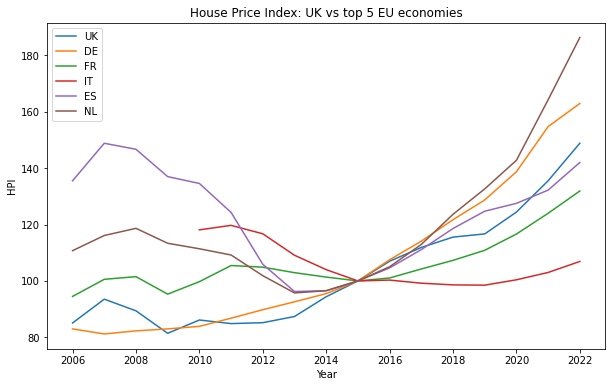

In [401]:
# UK House Price Index vs top 5 EU countries with the highest GDP (nominal)

plt.figure(figsize=(10,6))

plt.plot(df_euhouseindex.UK, label='UK')
plt.plot(df_euhouseindex.DE, label='DE')
plt.plot(df_euhouseindex.FR, label='FR')
plt.plot(df_euhouseindex.IT, label='IT')
plt.plot(df_euhouseindex.ES, label='ES')
plt.plot(df_euhouseindex.NL, label='NL')

plt.title('House Price Index: UK vs top 5 EU economies')
plt.ylabel('HPI')
plt.xlabel('Year')
plt.legend(loc="upper left")
plt.show()

#### 2. How did the House Price Index and the average price paid evolve in London by region and compared to the rest of the UK?

Overall, the House Price Index in London follows the general trend of the HPI in the rest of the UK, however, the average price paid in London remained significantly higher than the rest of the UK. By the end of 2022, the average price of a property in the UK was £289.956, while in London it was £535.407. In Inner London the average price was £622.388, in Outer London it was £491.926, while in the City of London the average price paid was £953.985.
During the period analysed, we can see the decline of prices in all regions due to the 2008 financial crisis.
Until 2020, we see no significant differences in the HPI between Inner and Outer London, however, since that year we can see that tprices in Outer London started to increase at a faster rate.
From the start of the Covid-19 pandemic in March 2020 to September 2022, the average price paid in Inner London increased by 9.1%, while in Outer London, it increased by 16.4% 
This is due to the relative affordability of Outer London compared to Inner London, which means that as prices rise, buyers are pushed further out of the centre.
Additionally, the adoption of remote work during the Covid-19 pandemic, maeans that people do not mind living further away.

In [529]:
# Calculate average price December 2022 for UK, London, Inner London, Outer London, City of London.

uk_dec22avg = uk_df.loc['2022-12-01', 'Average price All property types']
london_dec22avg = london_df.loc['2022-12-01', 'Average price All property types']
innerlondon_dec22avg = innerlondon_df.loc['2022-12-01', 'Average price All property types']
outerlondon_dec22avg = outerlondon_df.loc['2022-12-01', 'Average price All property types']
cityoflondon_dec22avg = cityoflondon_df.loc['2022-12-01', 'Average price All property types']

f'Average price paid for all property types during December 2022: UK: £{uk_dec22avg}. London: £{london_dec22avg}. Inner London: £{innerlondon_dec22avg}. Outer London: £{outerlondon_dec22avg}. City of London: £{cityoflondon_dec22avg}'

'Average price paid for all property types during December 2022: UK: £289956. London: £535407. Inner London: £622388. Outer London: £491926. City of London: £953985'

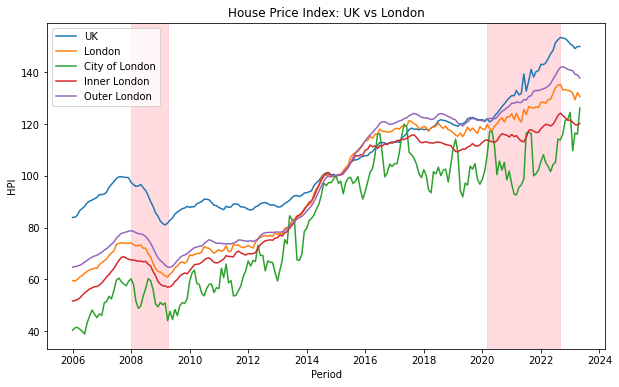

In [461]:
# UK vs London vs London by Region House Price Index comparison

plt.figure(figsize=(10,6))

plt.plot(uk_df['House price index All property types'], label='UK')
plt.plot(london_df['House price index All property types'], label='London')
plt.plot(cityoflondon_df['House price index All property types'], label='City of London')
plt.plot(innerlondon_df['House price index All property types'], label='Inner London')
plt.plot(outerlondon_df['House price index All property types'], label='Outer London')

plt.title('House Price Index: UK vs London')
plt.ylabel('HPI')
plt.xlabel('Period')
plt.legend(loc="upper left")

plt.axvspan(datetime(2008, 1, 1), datetime(2009, 4, 1), color='lightpink', alpha=0.5)
plt.axvspan(datetime(2020, 3, 1), datetime(2022, 9, 1), color='lightpink', alpha=0.5)

plt.show()


In [506]:
# Calculate average house price increase from March 2020 to September 2022 in inner and outer London.

covid_innerL_increase = (innerlondon_df.loc['2022-09-01', 'Average price All property types'] - innerlondon_df.loc['2020-03-01', 'Average price All property types']) / innerlondon_df.loc['2020-03-01', 'Average price All property types'] * 100
covid_outerL_increase = (outerlondon_df.loc['2022-09-01', 'Average price All property types'] - outerlondon_df.loc['2020-03-01', 'Average price All property types']) / outerlondon_df.loc['2020-03-01', 'Average price All property types'] * 100

f'Pandemic impact on Inner and Outer London prices. Between March 2022 and September 2022, Inner London prices increases by: {covid_innerL_increase:.1f}%. In Outer London, they increased by {covid_outerL_increase:.1f}%'


'Pandemic impact on Inner and Outer London prices. Between March 2022 and September 2022, Inner London prices increases by: 9.1%. In Outer London, they increased by 16.4%'

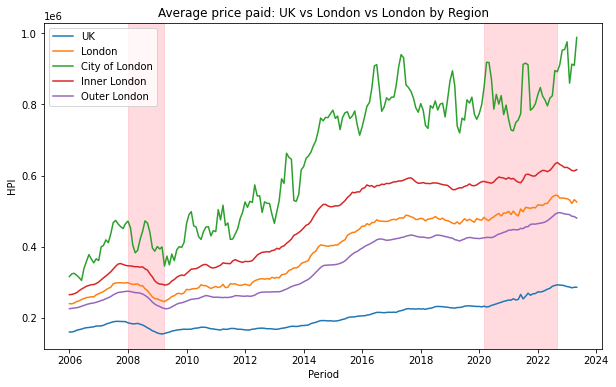

In [520]:
# UK vs London vs London by Region average price paid all property types comparison

plt.figure(figsize=(10,6))

plt.plot(uk_df['Average price All property types'], label='UK')
plt.plot(london_df['Average price All property types'], label='London')
plt.plot(cityoflondon_df['Average price All property types'], label='City of London')
plt.plot(innerlondon_df['Average price All property types'], label='Inner London')
plt.plot(outerlondon_df['Average price All property types'], label='Outer London')

plt.title('Average price paid: UK vs London vs London by Region')
plt.ylabel('HPI')
plt.xlabel('Period')
plt.legend(loc="upper left")

plt.axvspan(datetime(2008, 1, 1), datetime(2009, 4, 1), color='lightpink', alpha=0.5)
plt.axvspan(datetime(2020, 3, 1), datetime(2022, 9, 1), color='lightpink', alpha=0.5)

plt.show()

#### 3. How did the volume of sales evolve during the period analysed?

When looking at the volume of sales in London since 2006, we can see three main periods of interest.
First of all, we can note an important decrease in activity during 2007 and 2008 due to the global financial crisis.
Next, we see an spike in sales volumes during the first trimester of 2016, caused by a rush to beat the introduction of the higher rates on additional properties in April 2016. (https://www.theguardian.com/money/2016/apr/21/rush-to-beat-stamp-duty-changes-causes-surge-in-housing-market-activity).
Finally, we see another important increase in the number of sales during the first part of 2021, when investors rushed to complete transactions to take advantage of stamp duty discounts which lasted until the end of June 2021.
(https://www.theguardian.com/business/2021/jul/21/uk-record-houses-sold-in-a-month-stamp-duty)

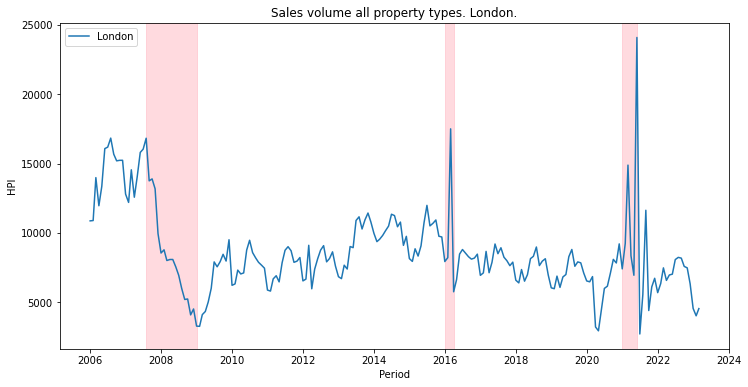

In [513]:
# London sales volume all property types

plt.figure(figsize=(12,6))

plt.plot(london_df['Sales volume'], label='London')

plt.title('Sales volume all property types. London.')
plt.ylabel('HPI')
plt.xlabel('Period')
plt.legend(loc="upper left")

plt.axvspan(datetime(2007, 8, 1), datetime(2009, 1, 1), color='lightpink', alpha=0.5)
plt.axvspan(datetime(2016, 1, 1), datetime(2016, 4, 1), color='lightpink', alpha=0.5)
plt.axvspan(datetime(2021, 1, 1), datetime(2021, 6, 1), color='lightpink', alpha=0.5)

plt.show()

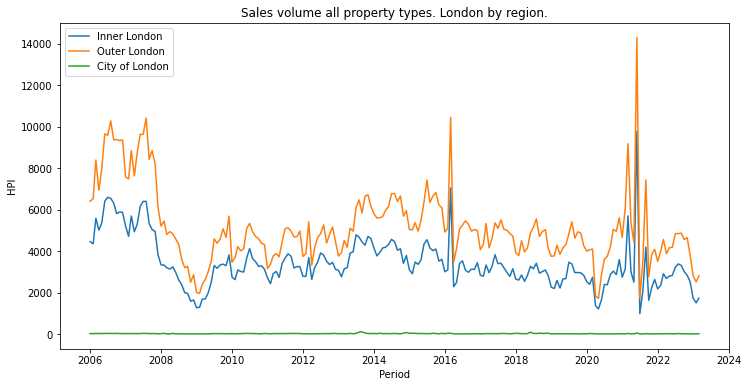

In [514]:
# London by region sales volume all property types

plt.figure(figsize=(12,6))

plt.plot(innerlondon_df['Sales volume'], label='Inner London')
plt.plot(outerlondon_df['Sales volume'], label='Outer London')
plt.plot(cityoflondon_df['Sales volume'], label='City of London')

plt.title('Sales volume all property types. London by region.')
plt.ylabel('HPI')
plt.xlabel('Period')
plt.legend(loc="upper left")

plt.show()

#### 4. How do prices by property type compare?

Excluding the period between 2007 and 2008 during the global financial crisis, we can see that the house price index for all property types has increased at a similar rate until 2016, where the price index of houses of all types (terraced, semi-detached and detached) started to increase at a faster rate than flats and maisonettes. We can particularly see this tendency to solidify during the Covid-19 pandemic. As a result of the lockdowns, buyers have started to prioritise more space, especially outdoors, which explains this change in demand patterns.
(https://www.standard.co.uk/homesandproperty/property-news/london-housing-market-flats-house-prices-flat-prices-b1072283.html)

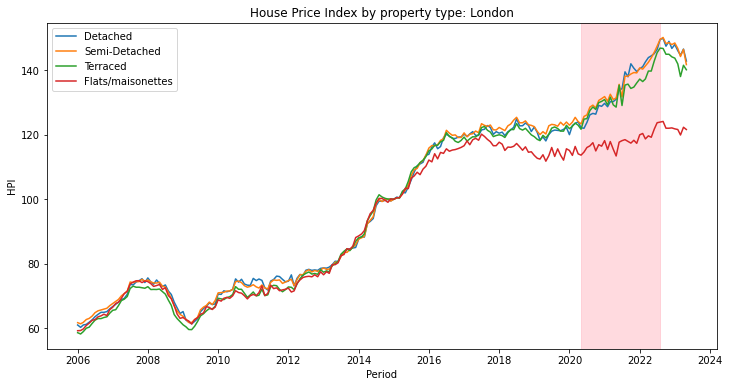

In [515]:
# London House Price Index by property type

plt.figure(figsize=(12,6))

plt.plot(london_df['House price index Detached houses'], label='Detached')
plt.plot(london_df['House price index Semi-detached houses'], label='Semi-Detached')
plt.plot(london_df['House price index Terraced houses'], label='Terraced')
plt.plot(london_df['House price index Flats and maisonettes'], label='Flats/maisonettes')

plt.title('House Price Index by property type: London')
plt.ylabel('HPI')
plt.xlabel('Period')
plt.legend(loc="upper left")

plt.axvspan(datetime(2020, 5, 1), datetime(2022, 8, 1), color='lightpink', alpha=0.5)

plt.show()

# Since 2020 the HPI of houses has been rising sharply compared to flats/maisonettes. Is this because of the lockdowns?

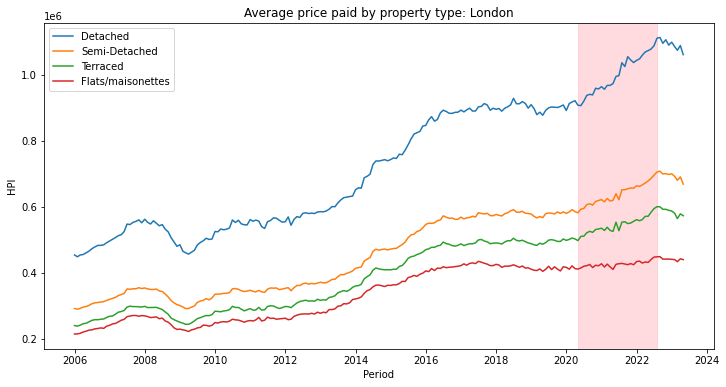

In [517]:
# London Average price paid by property type

plt.figure(figsize=(12,6))

plt.plot(london_df['Average price Detached houses'], label='Detached')
plt.plot(london_df['Average price Semi-detached houses'], label='Semi-Detached')
plt.plot(london_df['Average price Terraced houses'], label='Terraced')
plt.plot(london_df['Average price Flats and maisonettes'], label='Flats/maisonettes')

plt.title('Average price paid by property type: London')
plt.ylabel('HPI')
plt.xlabel('Period')
plt.legend(loc="upper left")

plt.show()

#### 5. How are buyers financing their purchases?

Across the years examined, on average, 77% of transactions were financed with a mortgage. During the period of low interest rates between 2012 and the beggining of 2022 the proportion of mortgage purchases shows a tendency to increase, with a fall starting in 2022.

In [530]:
# Calculate proportion of purchases financed by each method per year

finmethod_df_london = london_df.groupby(london_df['Period'].dt.year)[['Sales volume Mortgage purchases', 'Sales volume Cash purchases']].sum()
zerovalues = finmethod_df_london[(finmethod_df_london['Sales volume Mortgage purchases'] == 0) | (finmethod_df_london['Sales volume Cash purchases'] == 0) ].index
finmethod_df_london.drop(zerovalues, inplace=True)
finmethod_df_london['Mortgage Purchases Percentage'] = round(finmethod_df_london['Sales volume Mortgage purchases'] / (finmethod_df_london['Sales volume Mortgage purchases'] + finmethod_df_london['Sales volume Cash purchases']) * 100, 1)
finmethod_df_london['Cash Purchases Percentage'] = round(finmethod_df_london['Sales volume Cash purchases'] / (finmethod_df_london['Sales volume Mortgage purchases'] + finmethod_df_london['Sales volume Cash purchases']) * 100, 1)
finmethod_df_london

,Sales volume Mortgage purchases,Sales volume Cash purchases,Mortgage Purchases Percentage,Cash Purchases Percentage
Period,,,,
2012,70190.0,23668.0,74.8,25.2
2013,82768.0,29205.0,73.9,26.1
2014,91237.0,30704.0,74.8,25.2
2015,88619.0,27837.0,76.1,23.9
2016,80442.0,24297.0,76.8,23.2
2017,73362.0,22633.0,76.4,23.6
2018,71455.0,18396.0,79.5,20.5
2019,68925.0,16206.0,81.0,19.0
2020,58604.0,13965.0,80.8,19.2


In [536]:
# Calculate percentage of purchases financed with a mortgage across all the years analysed

round(finmethod_df_london['Sales volume Mortgage purchases'].sum() / (finmethod_df_london['Sales volume Mortgage purchases'].sum() + finmethod_df_london['Sales volume Cash purchases'].sum()) * 100, 1)

77.33

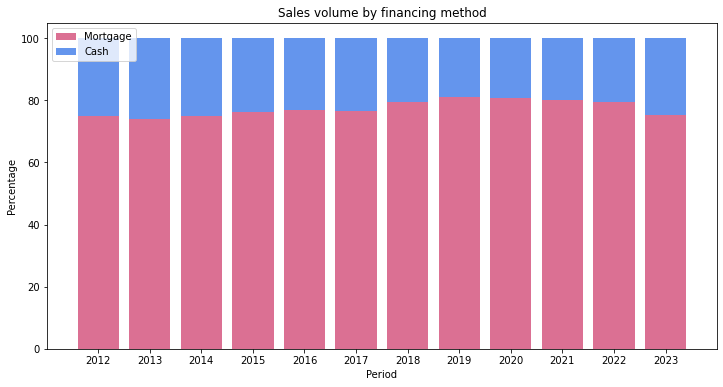

In [537]:
# London Property Sales by financing method

plt.figure(figsize=(12,6))

plt.bar(finmethod_df_london.index, finmethod_df_london['Mortgage Purchases Percentage'], color='palevioletred', label='Mortgage')
plt.bar(finmethod_df_london.index, finmethod_df_london['Cash Purchases Percentage'], bottom=finmethod_df_london['Mortgage Purchases Percentage'], color='cornflowerblue', label='Cash')

plt.title('Sales volume by financing method')
plt.ylabel('Percentage')
plt.xlabel('Period')
plt.xticks(finmethod_df_london.index)
plt.legend(loc="upper left")

plt.show()